Bank Churn prediction
===
This lecture covers predicting customer churn behavior at a bank using supervised machine learning models. It walks through the full process from exploratory data analysis to feature engineering, model training, evaluation, and deployment.

Some key points:
---
- Exploratory data analysis is done visualizing the data distributions and relationships using techniques like countplots.
- Feature engineering steps include one-hot encoding categorical variables like country and label encoding for gender.
- Several models are trained and evaluated: logistic regression, random forest, and XGBoost. Metrics like F1-score, recall, and confusion matrices are used.
- An ensemble combining the logistic regression and XGBoost models is created and shows improved performance.
- Final models are saved for deployment using pickle.
- Code is provided to run the full pipeline on Google Colab using data from Kaggle.

```
How to face the Layoff flow in Market's trend

If we are not being reused in the workplace, we can analyze customer data to understand the customer churn rate,
thereby increasing our importance and indispensability.

```

Reference
---

1. [src](https://platform.stratascratch.com/data-projects/customer-churn-prediction)
2. [src](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset), from kaggle
3. [Home work](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb), [data](https://www.kaggle.com/datasets/sebastienverpile/consumercomplaintsdata)

   
[code](https://www.analyticsvidhya.com/blog/2022/09/bank-customer-churn-prediction-using-machine-learning/)

Run in Google Drive, colab
---

1. Login google drive, add `colab` plugin
2. create 2024 foloder, enter it and create data, named data; download data from Kaggle to it.
3. create colab, open left menu and upload kaggle data intp `data`
4. run

In [ ]:
# feature encoder
!pip install -q category_encoders

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

import gc
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import pickle
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data= '/content/gdrive/MyDrive/2023/2023-2-Python-AI/data/archive.zip'
df=pd.read_csv(data)

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<Axes: xlabel='country', ylabel='count'>

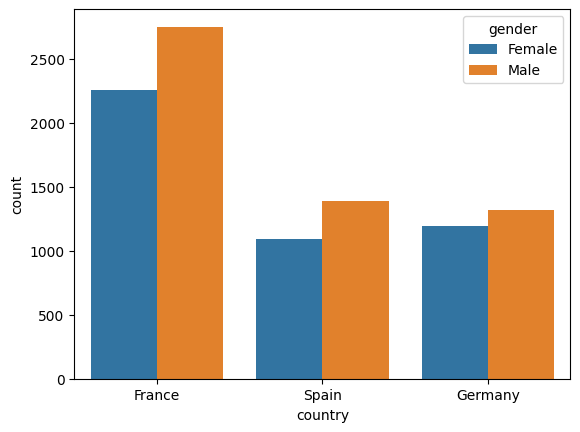

In [ ]:
sns.countplot(x ='country',hue='gender',data = df)


<Axes: xlabel='country', ylabel='count'>

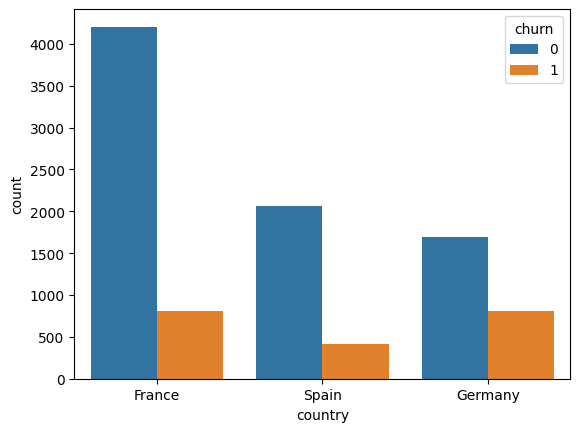

In [ ]:
sns.countplot(x ='country',hue='churn',data = df)


In [ ]:
# database diveded
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

X.head()

,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,France,Female,42,2,0.00,1,1,1,101348.88
1,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,France,Female,42,8,159660.80,3,1,0,113931.57
3,France,Female,39,1,0.00,2,0,0,93826.63
4,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
df[['country']].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['country'])

encoder.fit(X, y)
X_cleaned = encoder.transform(X)


In [ ]:
target_encoder = ce.TargetEncoder(cols=['country'])
target_encoder.fit(X, y)
X_cleaned = target_encoder.transform(X)

In [ ]:
X_cleaned

,country_1,country_2,country_3,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,Female,42,2,0.00,1,1,1,101348.88
1,0,1,0,Female,41,1,83807.86,1,0,1,112542.58
2,1,0,0,Female,42,8,159660.80,3,1,0,113931.57
3,1,0,0,Female,39,1,0.00,2,0,0,93826.63
4,0,1,0,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,Male,39,5,0.00,2,1,0,96270.64
9996,1,0,0,Male,35,10,57369.61,1,1,1,101699.77
9997,1,0,0,Female,36,7,0.00,1,0,1,42085.58
9998,0,0,1,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
# convert the new features to actural country
X_cleaned.rename(columns={'country_1':'France','country_2':'Spain','country_3':'Germany'},inplace=True)
X=X_cleaned
X

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,Female,42,2,0.00,1,1,1,101348.88
1,0,1,0,Female,41,1,83807.86,1,0,1,112542.58
2,1,0,0,Female,42,8,159660.80,3,1,0,113931.57
3,1,0,0,Female,39,1,0.00,2,0,0,93826.63
4,0,1,0,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,Male,39,5,0.00,2,1,0,96270.64
9996,1,0,0,Male,35,10,57369.61,1,1,1,101699.77
9997,1,0,0,Female,36,7,0.00,1,0,1,42085.58
9998,0,0,1,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
# convert 'gender' to 0 (male) or 1 (femail),
X['gender']=X['gender'].apply(lambda x:1 if x=='Female' else 0)
X

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,1,42,2,0.00,1,1,1,101348.88
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58
2,1,0,0,1,42,8,159660.80,3,1,0,113931.57
3,1,0,0,1,39,1,0.00,2,0,0,93826.63
4,0,1,0,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,39,5,0.00,2,1,0,96270.64
9996,1,0,0,0,35,10,57369.61,1,1,1,101699.77
9997,1,0,0,1,36,7,0.00,1,0,1,42085.58
9998,0,0,1,0,42,3,75075.31,2,1,0,92888.52


In [ ]:
# none is nan
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fance             10000 non-null  int64  
 1   Spain             10000 non-null  int64  
 2   Germany           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


Model
---
database -> train set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 7389 to 2732
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fance             8000 non-null   int64  
 1   Spain             8000 non-null   int64  
 2   Germany           8000 non-null   int64  
 3   gender            8000 non-null   int64  
 4   age               8000 non-null   int64  
 5   tenure            8000 non-null   int64  
 6   balance           8000 non-null   float64
 7   products_number   8000 non-null   int64  
 8   credit_card       8000 non-null   int64  
 9   active_member     8000 non-null   int64  
 10  estimated_salary  8000 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 750.0 KB


In [ ]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(X_test)

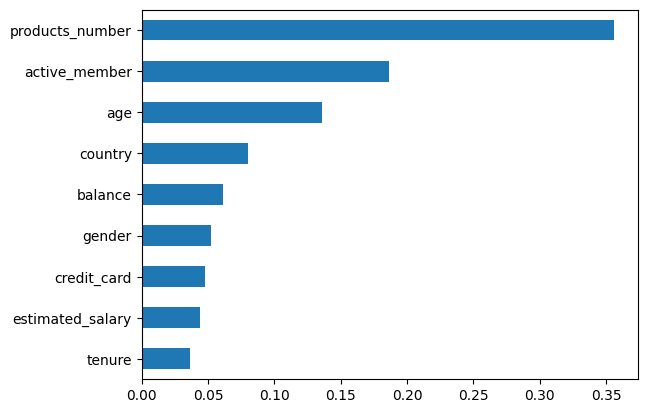

In [ ]:
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

Metrics
---

1. `Precision`: Precision is the ratio of true positives (TP) to the sum of true positives and false positives (FP):
Precision = TP / (TP + FP)

2. `Recall`: Recall is the ratio of true positives (TP) to the sum of true positives and false negatives (FN):
Recall = TP / (TP + FN)

3. `F1`-score: The F1-score is the harmonic mean of precision and recall:
$$F1 = 2  \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$$

In [ ]:
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.66      0.52      0.58       405

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



0.849

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.summer):
    plt.clf
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',fontsize=22)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

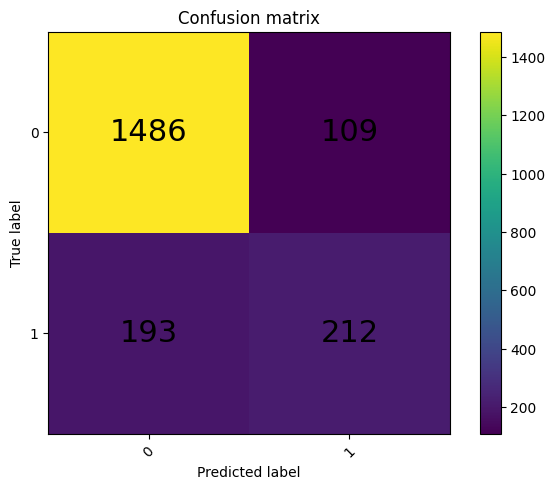

In [ ]:
plot_confusion_matrix(cnf_matrix, np.unique(y_pred))


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.24 %
Standard Deviation: 1.32 %


Ensemble of Models
---

In [ ]:
list_of_models = {
    'logistic_regression' : LogisticRegression(random_state = 42, max_iter = 10000),
    'Random_forest' : RandomForestClassifier(n_estimators = 150, max_depth = 4, random_state = 42),
    "XGBoost" : xgb.XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42)
}

In [ ]:
f1_train_scores = []
f1_test_scores = []
recall_test_scores = []
model_names = list(list_of_models.keys())

[]


For Model: logistic_regression

For Training Set:

Macro F1 Score: 0.44320712694877507

Confusion Matrix:


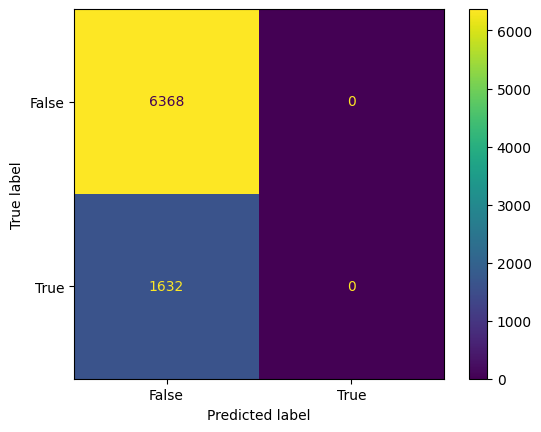

For Test Set:

Macro F1 Score: 0.4436717663421419

Confusion Matrix:


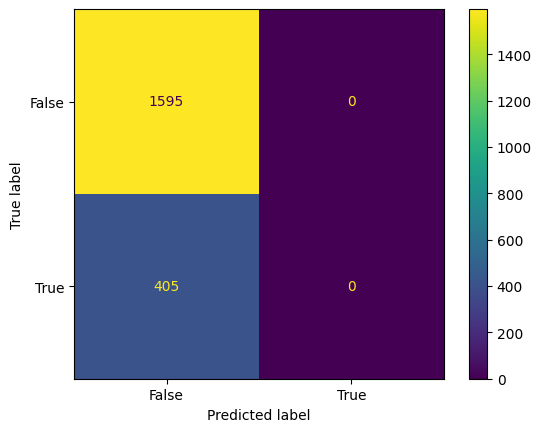


For Model: Random_forest

For Training Set:

Macro F1 Score: 0.6369359573181912

Confusion Matrix:


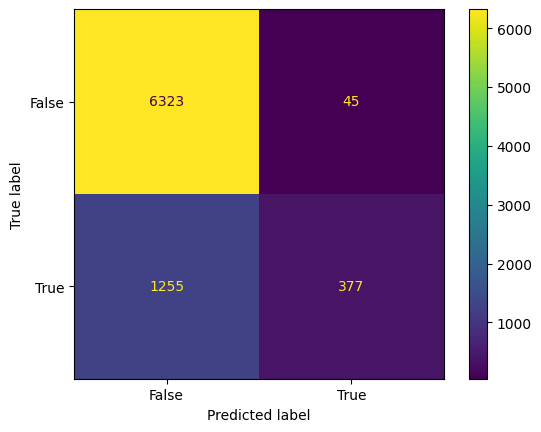

For Test Set:

Macro F1 Score: 0.6590613223706748

Confusion Matrix:


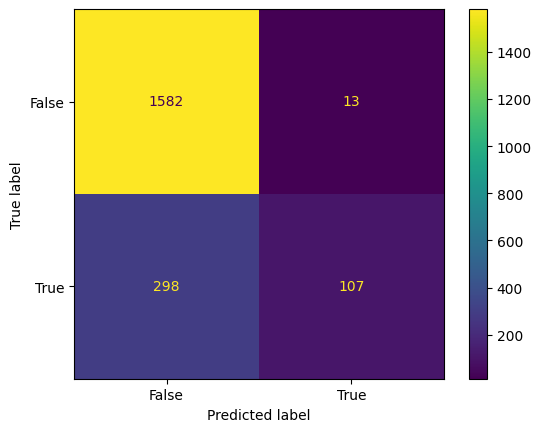


For Model: XGBoost

For Training Set:

Macro F1 Score: 0.9208428061749498

Confusion Matrix:


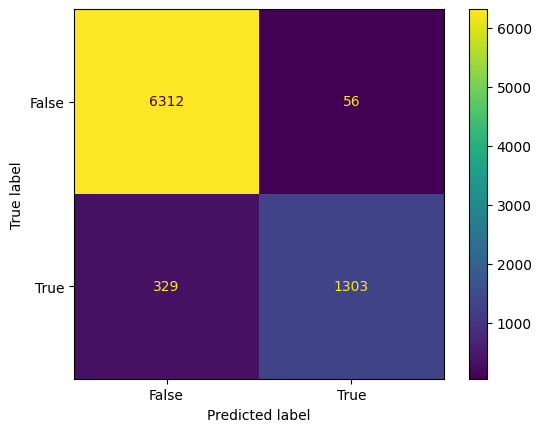

For Test Set:

Macro F1 Score: 0.7385978048961475

Confusion Matrix:


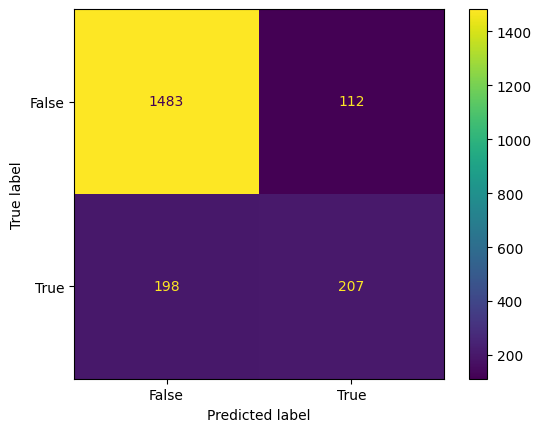

In [ ]:
for model in model_names:
    print("\nFor Model:", model)

    list_of_models[model].fit(X_train, y_train)

    print("\nFor Training Set:")

    y_train_pred = list_of_models[model].predict(X_train)

    f1_train = f1_score(y_train, y_train_pred, average='macro')
    print("\nMacro F1 Score:", f1_train)

    print("\nConfusion Matrix:")
    Confusion_Matrix = confusion_matrix(y_train.values, y_train_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

    print("For Test Set:")

    y_test_pred = list_of_models[model].predict(X_test)

    f1_test = f1_score(y_test, y_test_pred, average='macro')
    print("\nMacro F1 Score:", f1_test)

    recall_test_score = recall_score(y_test, y_test_pred, average='macro')

    print("\nConfusion Matrix:")
    Confusion_Matrix = confusion_matrix(y_test, y_test_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)
    recall_test_scores.append(recall_test_score)

In [ ]:
print("model_names           f1_train_scores  f1_test_scores   recall_test_scores")
for i in range(len(model_names)):
    print(f"{model_names[i]:<22} {f1_train_scores[i]:.6f}          {f1_test_scores[i]:.6f}.          {recall_test_scores[i]:.6f}")

model_names           f1_train_scores  f1_test_scores   recall_test_scores
logistic_regression    0.443207          0.443672.          0.500000
Random_forest          0.636936          0.659061.          0.628024
XGBoost                0.920843          0.738598.          0.720446


In [ ]:
df_score=pd.DataFrame()
df_score['model']=model_names
df_score['f1_train_scores']=f1_train_scores
df_score['f1_test_scores']=f1_test_scores
df_score['recall_test_scores']=recall_test_scores
df_score

,model,f1_train_scores,f1_test_scores,recall_test_scores
0,logistic_regression,0.443207,0.443672,0.500000
1,Random_forest,0.636936,0.659061,0.628024
2,XGBoost,0.920843,0.738598,0.720446


In [ ]:
# convert to table
from IPython.display import HTML
HTML(df_score.to_html())

,model,f1_train_scores,f1_test_scores,recall_test_scores
0,logistic_regression,0.443207,0.443672,0.500000
1,Random_forest,0.636936,0.659061,0.628024
2,XGBoost,0.920843,0.738598,0.720446


In [ ]:
log_reg_model = LogisticRegression(random_state = 42, max_iter = 10000)
xgb_model = xgb.XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42)

#fit logistic regression model
log_reg_model.fit(X, y)
#fit xgb model
xgb_model.fit(X, y)

#predict using ensemble of both the models
y_pred_proba_log = [x[1] for x in log_reg_model.predict_proba(X)]
y_pred_proba_xgb = [x[1] for x in xgb_model.predict_proba(X)]
y_pred_proba_log = np.array(y_pred_proba_log)
y_pred_proba_xgb = np.array(y_pred_proba_xgb)

y_pred_proba = (y_pred_proba_log + y_pred_proba_xgb) / 2.0

y_pred = np.where(y_pred_proba > 0.4, 1, 0)





Macro F1 Score: 0.8647570633146873

Macro Recall Score: 0.8357139743823776

Confusion Matrix:


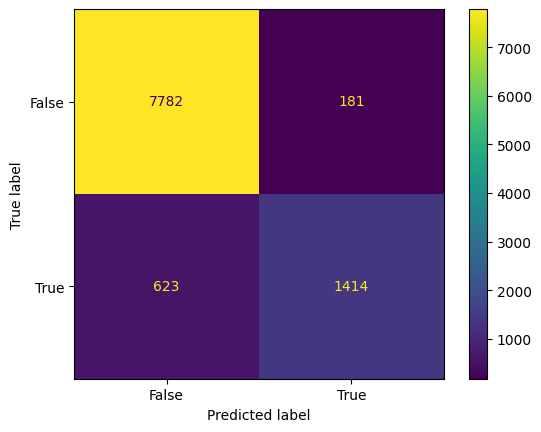

In [ ]:
f1 = f1_score(y, y_pred, average = 'macro')
print("\nMacro F1 Score:", f1)

recall = recall_score(y, y_pred, average = 'macro')
print("\nMacro Recall Score:", recall)

print("\nConfusion Matrix:")
Confusion_Matrix = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#Save and export models to be used in deployment
import pickle
#Save and export models to be used in deployment

pickle.dump(log_reg_model, open('churn_logistic_regression_model_for_deployment.pkl','wb'))
pickle.dump(xgb_model, open('churn_xgb_model_for_deployment.pkl','wb'))

In [ ]:
X.head(5)

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,1,0,0,1,42,2,0.00,1,1,1,101348.88
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58
2,1,0,0,1,42,8,159660.80,3,1,0,113931.57
3,1,0,0,1,39,1,0.00,2,0,0,93826.63
4,0,1,0,1,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.columns

Index(['Fance', 'Spain', 'Germany', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

Imbalance Problem
---
Gerenally, churn data is a little small such that affects the prediction. Here we can enlarge the churn dataset by simulation, and re-make the prediction model:

```python
X = df_data_model.loc[:, df_data_model.columns!=’churn’]
y = df_data_model[‘churn’]

# from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)
print(‘Original dataset shape’, Counter(y))
print(‘Resample dataset shape’, Counter(y_smote))

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_smote, y_smote, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print(‘Train’, X_train.shape, y_train.shape)
print(‘Test’, X_valid.shape, y_valid.shape)

#adaboost model training
ada_clf = AdaBoostClassifier(random_state=0)
kfold = KFold(n_splits = 10, random_state = 5)
results = cross_val_score(ada_clf, X_train, y_train, cv = kfold)
print(results.mean())


#train model
ada_clf.fit(X_train, y_train)
#make predictions
y_pred = ada_clf.predict(X_valid)
#metrics
print('Model accuracy score: ',accuracy_score(y_valid,y_pred))
print('Confusion matrix: ')
print(confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred))
```

Appendix, Pycaret Review
---

In [ ]:
!pip install -U pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
X['churn']=y

In [ ]:
X.head(2)

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,1,0,0,1,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
clf = setup(data=X,target='churn',session_id=123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(7000, 12)"
6,Transformed test set shape,"(3000, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8619,0.8618,0.4629,0.7683,0.5770,0.5005,0.5238,0.7790
lightgbm,Light Gradient Boosting Machine,0.8583,0.8478,0.4867,0.7292,0.5832,0.5019,0.5171,1.3080
rf,Random Forest Classifier,0.8551,0.8443,0.4495,0.7377,0.5582,0.4777,0.4989,0.9610
ada,Ada Boost Classifier,0.8523,0.8435,0.4580,0.7174,0.5581,0.4746,0.4924,0.3830
xgboost,Extreme Gradient Boosting,0.8490,0.8323,0.4888,0.6816,0.5688,0.4803,0.4904,0.2040
et,Extra Trees Classifier,0.8473,0.8351,0.4447,0.6967,0.5424,0.4561,0.4729,1.0190
lr,Logistic Regression,0.8123,0.7678,0.2160,0.6182,0.3172,0.2372,0.2826,1.1030
lda,Linear Discriminant Analysis,0.8097,0.7718,0.2427,0.5807,0.3405,0.2512,0.2845,0.0710
ridge,Ridge Classifier,0.8079,0.7718,0.1339,0.6352,0.2201,0.1611,0.2259,0.0410
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
X.head(2)

,Fance,Spain,Germany,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,1,0,0,1,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,1,41,1,83807.86,1,0,1,112542.58,0


Improvements
---
- Using SHAP to analyze the key factors driving churn predictions from the XGBoost model
- Identifying high-risk customers based on a probability threshold
- Implementing a function to regularly score the full customer base and save high-risk cases
- Setting up the scoring function to run as a recurring monthly job

In [2]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.7 MB/s eta 0:00:00


In [3]:
# Root Cause Analysis
import shap
import matplotlib.pyplot as plt

In [ ]:


# Load trained XGBoost model
xgb_model = pickle.load(open('churn_xgb_model.pkl', 'rb'))

# Sample customer data
customer_data = X.sample(100)

# Compute SHAP values to understand feature importance
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(customer_data)

# Visualize top factors driving churn predictions
shap.summary_plot(shap_values, customer_data, plot_type="bar")
plt.show()

# Churn Prevention
# Identify high-risk customers based on churn probability threshold
from sklearn.metrics import roc_curve

# Compute probability predictions
y_prob = xgb_model.predict_proba(X)[:,1]

# Compute false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Find threshold for 80% tpr
tpr80 = 0.8
idx = np.argwhere(tpr >= tpr80)[0]
threshold = thresholds[idx]

# Customers above threshold are high-risk
high_risk_customers = X[y_prob >= threshold]

print(f"Number of high-risk customers: {len(high_risk_customers)}")

# Monitoring System
import datetime

# Score full customer base each month
def score_customer_base(date):
    customers = get_all_customers(date)
    customers = preprocess_data(customers)
    scores = xgb_model.predict_proba(customers)[:,1]
    high_risk = customers[scores >= threshold]

    # Save high-risk cases for further action
    high_risk.to_csv(f"high_risk_{date}.csv")

# Set up monitoring job to run monthly
next_run = datetime.datetime.today() + datetime.timedelta(days=30)
score_customer_base(next_run)

Homework
---
Whatever method was used, `Domain Expertise` is the the important factor where the decision was made.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# gdrive/MyDrive/2023/2023-2-Python-AI

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/2023/2023-2-Python-AI/data

'Bank Customer Churn Prediction.csv'   sf_incidents16.csv   zipcodes_geo.json
 Consumer_Complaints.csv.zip	       sf_incidents17.csv
 crime_predictions.json		       uber-dataset.csv


In [ ]:
# Very complainted in the second issue
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/2023/2023-2-Python-AI/data/Consumer_Complaints.csv.zip')
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903983 entries, 0 to 903982
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 903983 non-null  object
 1   Product                       903983 non-null  object
 2   Sub-product                   668823 non-null  object
 3   Issue                         903983 non-null  object
 4   Sub-issue                     426386 non-null  object
 5   Consumer complaint narrative  199970 non-null  object
 6   Company public response       257981 non-null  object
 7   Company                       903983 non-null  object
 8   State                         894758 non-null  object
 9   ZIP code                      894705 non-null  object
 10  Tags                          126038 non-null  object
 11  Consumer consent provided?    375434 non-null  object
 12  Submitted via                 903983 non-null  object
 13 

In [ ]:
# delete the feature which is absent too many items
df = df[pd.notnull(df['Consumer complaint narrative'])]
len(df)

199970

In [ ]:
df = df[['Product', 'Consumer complaint narrative']]
df['category_id'] = df['Product'].factorize()[0]
df.head(5)

<ipython-input-15-f45d0f3712bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_id'] = df['Product'].factorize()[0]


,Product,Consumer complaint narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


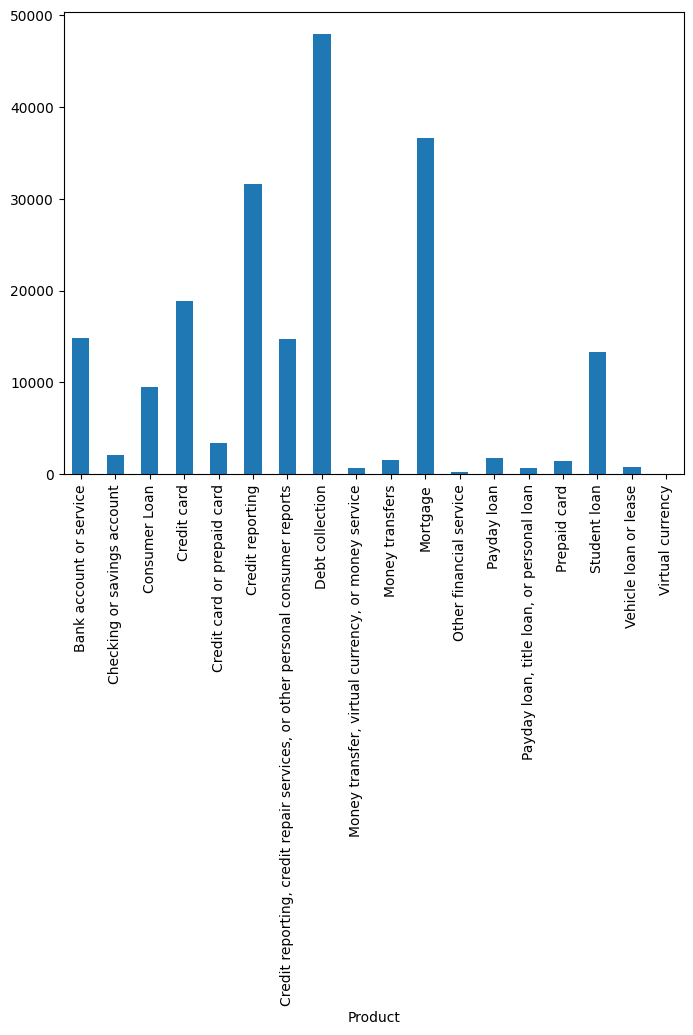

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product')['Consumer complaint narrative'].count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df['Consumer complaint narrative']).toarray()
labels = df.category_id
features.shape

In [ ]:
import gc
gc.collect()

0

In [ ]:
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [ ]:
# failed, scikit-learn 1.2.2
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))